## **Exploratory Data Analysis (EDA)**
------

##### **Goal:** Analzed the cleaned dataset to understand feature distributions, relationships, and patterns related to employee attrition.

##### **Dataset:** HR-Employee-Attrition-Cleaned.csv (1470 employees and 32 features)

In [1]:
# Load libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pathlib

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# Set up path for images
images_dir = pathlib.Path('../images')

### Load Cleaned Dataset

In [4]:
# load csv file
df = pd.read_csv("../data/HR-Employee-Attrition-Cleaned.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,8.0,Yes,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,49,0,Travel_Frequently,279.0,Research & Development,8.0,1.0,Life Sciences,3.0,Male,61.0,2.0,2.0,Research Scientist,2.0,Married,5130.0,24907.0,1.0,No,23.0,4.0,4.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,37,1,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,4.0,Male,92.0,2.0,1.0,Laboratory Technician,3.0,Single,2090.0,2396.0,6.0,Yes,15.0,3.0,2.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,33,0,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,4.0,Female,56.0,3.0,1.0,Research Scientist,3.0,Married,2909.0,23159.0,1.0,Yes,11.0,3.0,3.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,27,0,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,Male,40.0,3.0,1.0,Laboratory Technician,2.0,Married,3468.0,16632.0,9.0,No,12.0,3.0,4.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0


In [5]:
df.shape

(1470, 31)

In [6]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


##### **Dataset Dimensions**

In [7]:
print(f'Number of employees: {df.shape[0]}')
print(f'Number of variables: {df.shape[1]}')

Number of employees: 1470
Number of variables: 31


##### **Variable Types**

In [8]:
# Fix Attrition data type
df['Attrition'] = df['Attrition'].astype('object')

In [9]:
# Print categorical and numeric variables
cat_cols = df.select_dtypes(include = ['object']).columns
print(f'Number of categorical variables: {len(cat_cols)}')
print(f'\nList of categorical variables: {cat_cols}')

num_cols = [c for c in df if c not in cat_cols]
print(f'\nNumber of numeric variables: {len(num_cols)}')
print(f'\nList of numeric variables: {num_cols}')

Number of categorical variables: 8

List of categorical variables: Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

Number of numeric variables: 23

List of numeric variables: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


##### **Missing Data**

In [10]:
# Confirm no missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

**Cleaned Data Overview**

1470 employees and 32 variables.

**8 Categorical** variables: Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, OverTime

**24 Numeric** variables: Age, DailyRate, DistanceFromHome, Education, EmployeeNumber, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager 

There are no missing values.

### Univariate Analysis

##### **Outcome/Target**

In [11]:
df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [12]:
print(df['Attrition'].value_counts(normalize=True))
percentage_stayed = df['Attrition'].value_counts(normalize=True)[0].round(3) * 100
percentage_left = df['Attrition'].value_counts(normalize=True)[1].round(3) * 100

Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64


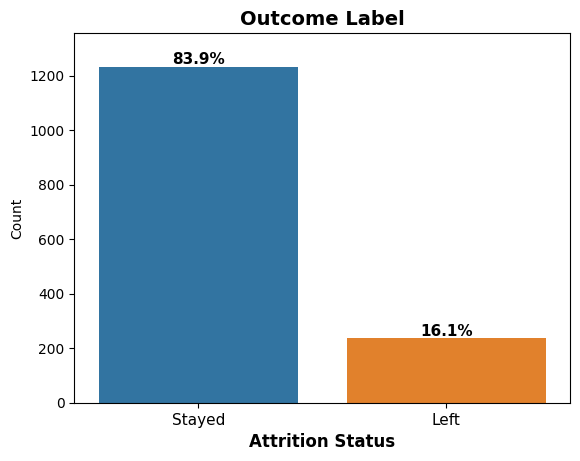

In [13]:
sns.countplot(data = df, x = 'Attrition', hue = 'Attrition')
plt.title("Outcome Label", fontsize=14, fontweight='bold')
plt.xticks([0,1], ["Stayed", "Left"], fontsize=11)
plt.xlabel("Attrition Status", fontsize=12, fontweight='bold')
plt.ylabel("Count")
plt.ylim(0, df['Attrition'].value_counts().max() * 1.10)
plt.text(0, df['Attrition'].value_counts()[0] + 10, f'{percentage_stayed:.1f}%', ha='center', fontsize=11, fontweight='bold')
plt.text(1, df['Attrition'].value_counts()[1] + 10, f'{percentage_left:.1f}%', ha='center', fontsize=11, fontweight='bold')
plt.legend().set_visible(False)

plt.savefig(images_dir / 'outcome_label_barchart.png', dpi=300, bbox_inches="tight")

##### **Categorical Variables**

In [14]:
# Create list of categorical variables excluding target variable (Attrition)
cat_cols_without_target = [c for c in cat_cols if c not in 'Attrition']
cat_cols_without_target

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

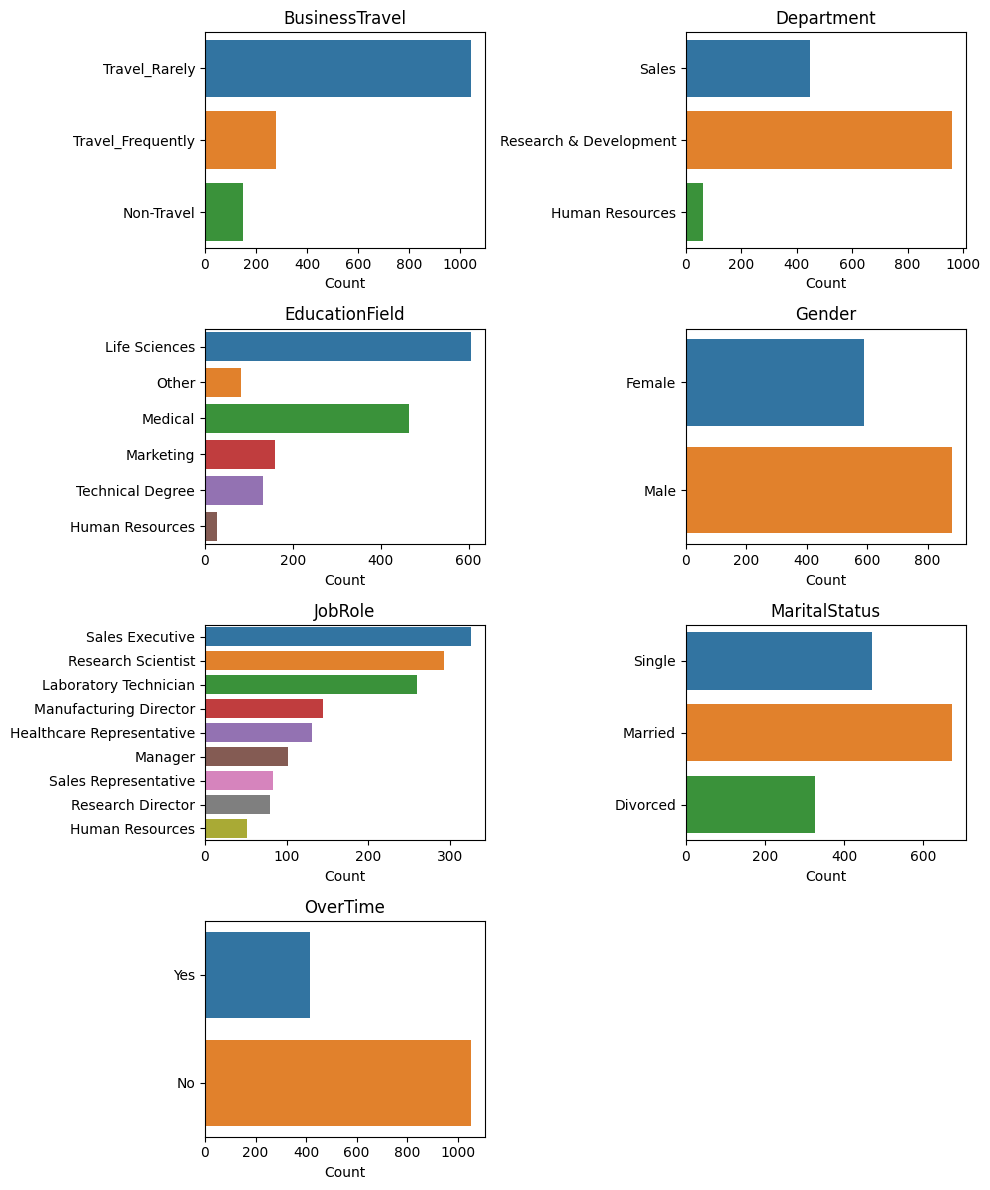

In [19]:
# Make Bar charts for categorical variables
fig, axes = plt.subplots(4, 2, figsize =(10,12))

for ax, col in zip(axes.flatten(), cat_cols_without_target):
    sns.countplot(y=col, data=df, ax=ax, hue=col)
    ax.set_title(col)
    ax.set_ylabel("")
    ax.set_xlabel("Count")

fig.delaxes(axes[3][1])

plt.tight_layout()

plt.savefig('../images/categorical_distributions.png', dpi=300, bbox_inches='tight')

## Key Observations (to expand later):
- Travel: Most employees rarely travel
- Department: R&D has most employees
- Gender: More males than females
- Job Role: Sales Executives most common
- Marital Status: More married employees
- Overtime: Most don't work overtime

##### **Numeric Variables**

Histogram of numeric variables

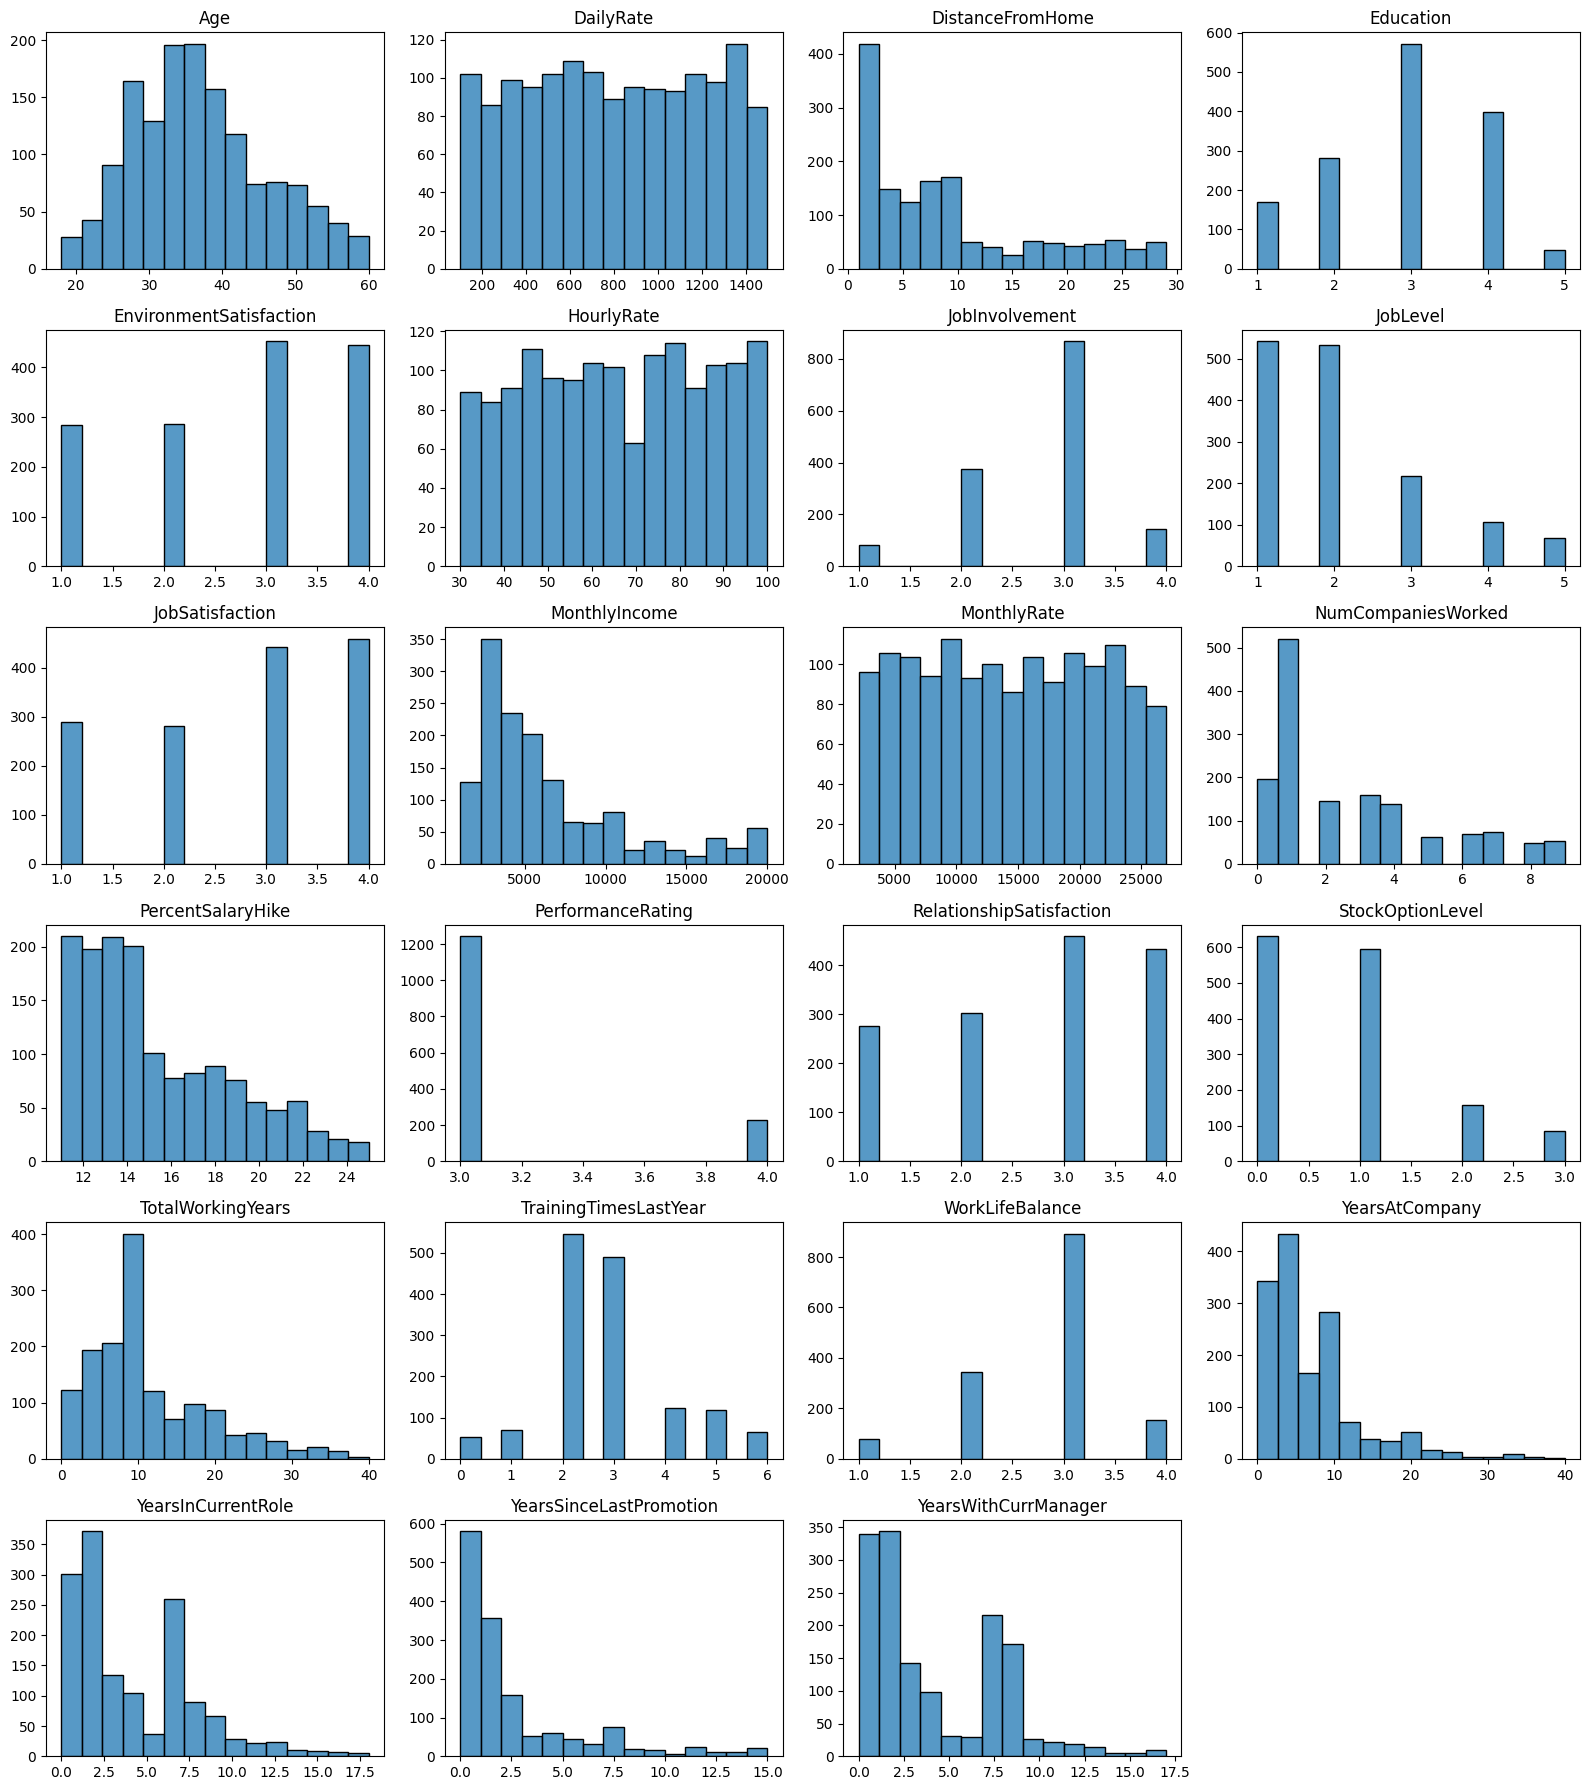

In [18]:
# Create histogram for all numeric variables
n = len(num_cols)
# Want 4 plots per row
cols = 4
rows = math.ceil(n/cols)
fig, axes = plt.subplots(rows, cols, figsize=(16, rows*3))

axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.histplot(x=df[col], ax=ax, bins=15)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("")

for ax in axes[len(num_cols):]:
    ax.set_visible(False)

plt.tight_layout()

plt.savefig('../images/numeric_distributions.png', dpi=300, bbox_inches='tight')